In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
census = pd.read_excel("shared_data_read_only/Data/AfriKids/ExternalReports/GES_EMIS/Census Data.xlsx")
census

,RegCode,Region,DstCode,District,Academic_Year,Cr_TotSchs_Pub,Cr_TotSchs_Prv,Kg_TotSchs_Pub,Kg_TotSchs_Prv,Prm_TotSchs_Pub,...,Pop12_14F,Pop14M,Pop14F,Pop15M,Pop15F,Pop15_18M,Pop15_18F,Pop18M,Pop18F,PopYear
0,1,ASHANTI,11,ADANSI NORTH,2010-2011,1,14,82,25,85,...,4295,1462,1314,1361,1196,4869,4222,1082,968,2010
1,1,ASHANTI,12,ADANSI SOUTH,2010-2011,0,10,99,30,105,...,5085,1785,1571,1672,1449,6007,5199,1326,1192,2010
2,1,ASHANTI,13,SEKYERE SOUTH,2010-2011,19,11,67,19,65,...,5980,1970,1846,1822,1692,6410,5978,1389,1346,2010
3,1,ASHANTI,14,AHAFO ANO NORTH,2010-2011,0,5,63,11,63,...,3110,1075,967,1010,899,3665,3248,821,747,2010
4,1,ASHANTI,15,AHAFO ANO SOUTH,2010-2011,2,9,97,17,95,...,5244,1815,1546,1614,1346,5436,4452,1154,960,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,10,WESTERN,148,TARKWA-NSUAEM MUNICIPAL,2010-2011,13,44,67,47,69,...,6565,2118,2117,2037,2051,7681,7836,1802,1872,2010
166,10,WESTERN,177,ELLEMBELE,2010-2011,0,4,76,15,74,...,3140,1126,1003,1092,964,4131,3660,962,878,2010
167,10,WESTERN,178,PRESTEA HUNI VALLEY,2010-2011,10,31,101,36,100,...,3284,1060,1060,1019,1026,3842,3920,902,937,2010
168,10,WESTERN,179,SEFWI AKONTOMBRA,2010-2011,1,5,54,16,56,...,2527,864,784,820,724,3022,2613,693,608,2010


In [40]:
agesex = pd.read_excel("shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3B_Age and Sex Profile_district.xlsx")
background = pd.read_excel("shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3C_Background Characteristics_ district.xlsx")
literacy = pd.read_excel("shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3D_Literacy and Education_district.xlsx")
economic = pd.read_excel("shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/VOL_3E_ Economic Activity_district.xlsx")
difficulty = pd.read_excel("shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3F_Difficulty in Performing Activities_district.xlsx")

In [41]:
education = pd.read_csv("education_region.csv")
education

,Total,"235,979","378,263","639,640","222,100","376,837","738,320","99,687","71,761","167,837","131,020","78,126","239,206","55,592","63,234","155,264","114,610"
0,JSS/JHS,"86,465","130,717","174,065","84,476","136,215","203,356","42,061","27,055","51,312","52,666","37,142","86,816","22,471","24,621","63,611","45,694"
1,SSS/SHS,"89,749","143,580","221,590","86,352","168,454","322,883","36,376","29,605","67,143","49,301","26,841","86,202","20,062","24,490","56,500","35,500"
2,Secondary,"1,423","1,656","4,116","1,201","1,893","3,093","1,151",408,595,677,441,"1,643",334,352,"1,237",976
3,Voc/Technical/Commercial,"4,429","6,859","11,584","7,671","5,793","6,274",576,831,"1,864","1,373",894,"3,485",548,815,"2,633","3,336"
4,Post middle/secondary Certificate,"1,823","2,774","6,515","1,924","3,409","6,349",517,595,"1,627","1,563",754,"2,445","1,054","1,316","1,355","1,060"
5,Post middle/secondary Diploma,"2,618","4,647","7,080","2,461","4,967","12,326","3,066","1,368","4,217","4,132","1,229","5,475","1,300","1,746","3,147","2,835"
6,Tertiary-Higher National Diploma,"22,737","17,425","43,471","15,204","21,979","36,657","5,156","3,671","11,078","8,425","4,963","20,319","5,250","4,697","11,833","9,466"
7,Tertiary - Bachelor's Degree,"22,924","61,201","146,230","19,288","27,934","127,867","9,098","5,846","25,935","9,451","4,851","23,967","2,818","2,816","11,330","11,842"
8,Tertiary - Postgraduate Certificate/Diploma,"2,172","4,539","8,290","2,142","3,813","11,866","1,278","2,003","2,744","2,815",735,"6,406","1,509","2,129","2,681","2,982"
9,Tertiary - Master's Degree,"1,259","3,891","13,003","1,019","1,860","6,141",330,286,999,459,198,"1,742",187,170,674,700


In [46]:
education_pivot = education.set_index(education.columns[0]).T
education_pivot = education_pivot.reset_index()
education_pivot.rename(columns={'index': 'Total'}, inplace=True)

education_pivot[' JSS/JHS'] = education_pivot[' JSS/JHS'].str.strip()
education_pivot['SSS/SHS'] = education_pivot['SSS/SHS'].str.strip()

# Step 2: Remove commas (or other non-numeric symbols if necessary)
education_pivot[' JSS/JHS'] = education_pivot[' JSS/JHS'].str.replace(',', '', regex=False)
education_pivot['SSS/SHS'] = education_pivot['SSS/SHS'].str.replace(',', '', regex=False)

# Step 3: Convert to numeric (any remaining non-numeric values will become NaN)
education_pivot[' JSS/JHS'] = pd.to_numeric(education_pivot[' JSS/JHS'], errors='coerce')
education_pivot['SSS/SHS'] = pd.to_numeric(education_pivot['SSS/SHS'], errors='coerce')

education_pivot['primary'] = education_pivot[' JSS/JHS'] + education_pivot['SSS/SHS']


# education_pivot['primary'] = education_pivot[' JSS/JHS'] + education_pivot['SSS/SHS']
education_pivot



Total,Total,JSS/JHS,SSS/SHS,Secondary,Voc/Technical/Commercial,Post middle/secondary Certificate,Post middle/secondary Diploma,Tertiary-Higher National Diploma,Tertiary - Bachelor's Degree,Tertiary - Postgraduate Certificate/Diploma,Tertiary - Master's Degree,Tertiary - Doctoral Degree,Other,Region,primary
0,"235,979",86465,89749,"1,423","4,429","1,823","2,618","22,737","22,924","2,172","1,259",306,74,Western,176214
1,"378,263",130717,143580,"1,656","6,859","2,774","4,647","17,425","61,201","4,539","3,891",749,225,Central,274297
2,"639,640",174065,221590,"4,116","11,584","6,515","7,080","43,471","146,230","8,290","13,003","2,222","1,474",Greater Accra,395655
3,"222,100",84476,86352,"1,201","7,671","1,924","2,461","15,204","19,288","2,142","1,019",256,106,Volta,170828
4,"376,837",136215,168454,"1,893","5,793","3,409","4,967","21,979","27,934","3,813","1,860",406,114,Eastern,304669
5,"738,320",203356,322883,"3,093","6,274","6,349","12,326","36,657","127,867","11,866","6,141","1,288",220,Ashanti,526239
6,"99,687",42061,36376,"1,151",576,517,"3,066","5,156","9,098","1,278",330,64,14,Western North,78437
7,"71,761",27055,29605,408,831,595,"1,368","3,671","5,846","2,003",286,71,22,Ahafo,56660
8,"167,837",51312,67143,595,"1,864","1,627","4,217","11,078","25,935","2,744",999,255,68,Bono,118455
9,"131,020",52666,49301,677,"1,373","1,563","4,132","8,425","9,451","2,815",459,96,62,Bono East,101967


In [47]:
education_melted = pd.melt(education_pivot, id_vars=['Region'], var_name='Education Level', value_name='Population')
education_melted

,Region,Education Level,Population
0,Western,Total,"235,979"
1,Central,Total,"378,263"
2,Greater Accra,Total,"639,640"
3,Volta,Total,"222,100"
4,Eastern,Total,"376,837"
...,...,...,...
219,Northern,primary,173018
220,Savannah,primary,42533
221,North East,primary,49111
222,Upper East,primary,120111


In [48]:
education_subset = education_melted.iloc[-16:]


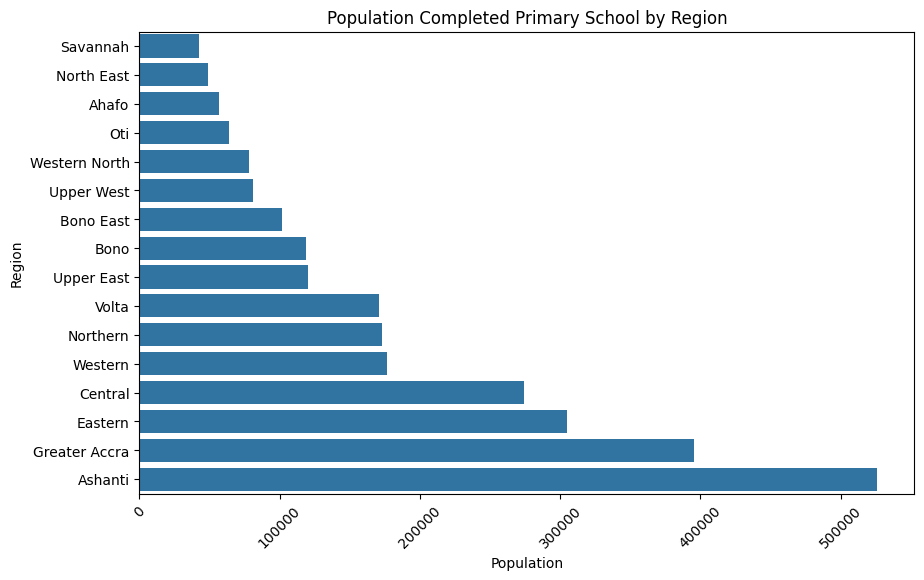

In [52]:

sorted = education_subset.sort_values(by='Population', ascending=True)

plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(data=sorted, y='Region', x='Population', orient='h')

# Customize the plot
plt.title("Population Completed Primary School by Region")
plt.xlabel("Population")
plt.ylabel("Region")
# plt.legend(title='Education Level')
plt.xticks(rotation=45)

# Show the plot
plt.show()